In [27]:
import pandas as pd
import numpy as np
# Reload the raw dataset to start fresh
df = pd.read_csv('../data/benin-malanville.csv')

print("First 10 rows of raw data:")
print(df[['GHI', 'DNI', 'DHI']].head(10))

print("\nRandom sample of 10 rows:")
print(df[['GHI', 'DNI', 'DHI']].sample(10))

# Check how many rows have negative values for each column
for col in ['GHI', 'DNI', 'DHI']:
    negative_count = len(df[df[col] < 0])
    print(f"Number of rows with {col} < 0: {negative_count} ({negative_count / len(df) * 100:.2f}%)")

First 10 rows of raw data:
   GHI  DNI  DHI
0 -1.2 -0.2 -1.1
1 -1.1 -0.2 -1.1
2 -1.1 -0.2 -1.1
3 -1.1 -0.1 -1.0
4 -1.0 -0.1 -1.0
5 -1.0 -0.1 -1.0
6 -1.0 -0.1 -1.0
7 -1.0 -0.1 -1.0
8 -1.0 -0.1 -1.0
9 -1.0 -0.1 -1.0

Random sample of 10 rows:
          GHI    DNI    DHI
151927  902.0  867.0  158.4
402995   -0.9   -0.6   -0.3
254461  376.2  595.2  129.1
228810   -3.0   -0.9   -2.7
5644     -1.4   -0.3   -1.4
299325   -6.4   -0.9   -8.8
316830   -6.7   -0.6   -8.0
517395   43.4    0.2   43.2
381877   -3.5   -0.3   -3.4
60323    -1.5   -0.3   -1.4
Number of rows with GHI < 0: 258847 (49.25%)
Number of rows with DNI < 0: 275987 (52.51%)
Number of rows with DHI < 0: 259182 (49.31%)


In [28]:
# How many rows do we actually have?
print("Data shape:", df.shape)

# Show summary of selected columns
print(df[['GHI', 'DNI', 'DHI', 'Tamb', 'WS']].describe())

Data shape: (525600, 19)
                 GHI            DNI            DHI           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961      28.179683   
std       331.131327     261.710501     158.691074       5.924297   
min       -12.900000      -7.800000     -12.600000      11.000000   
25%        -2.000000      -0.500000      -2.100000      24.200000   
50%         1.800000      -0.100000       1.600000      28.000000   
75%       483.400000     314.200000     216.300000      32.300000   
max      1413.000000     952.300000     759.200000      43.800000   

                  WS  
count  525600.000000  
mean        2.121113  
std         1.603466  
min         0.000000  
25%         1.000000  
50%         1.900000  
75%         3.100000  
max        19.500000  


In [29]:
# Summary statistics of all numeric columns
summary_stats = df.describe()
display(summary_stats)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [30]:
# Missing values count per column
missing_values = df.isna().sum()
display(missing_values)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [31]:
# Columns with more than 5% missing values
missing_percent = (missing_values / len(df)) * 100
cols_over_5pct_null = missing_percent[missing_percent > 5]
print("Columns with >5% missing values:")
print(cols_over_5pct_null)

Columns with >5% missing values:
Comments    100.0
dtype: float64


In [32]:
# Drop columns with more than 5% missing values
df = df.drop(columns=["Comments"])

In [33]:
irr_cols = ['GHI', 'DNI', 'DHI']
for col in irr_cols:
    df[col] = df[col].clip(lower=0)  # Set negative values to 0
    print(f"After clipping, number of rows with {col} < 0: {len(df[df[col] < 0])}")

After clipping, number of rows with GHI < 0: 0
After clipping, number of rows with DNI < 0: 0
After clipping, number of rows with DHI < 0: 0


In [34]:
#Convert Timestamp to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


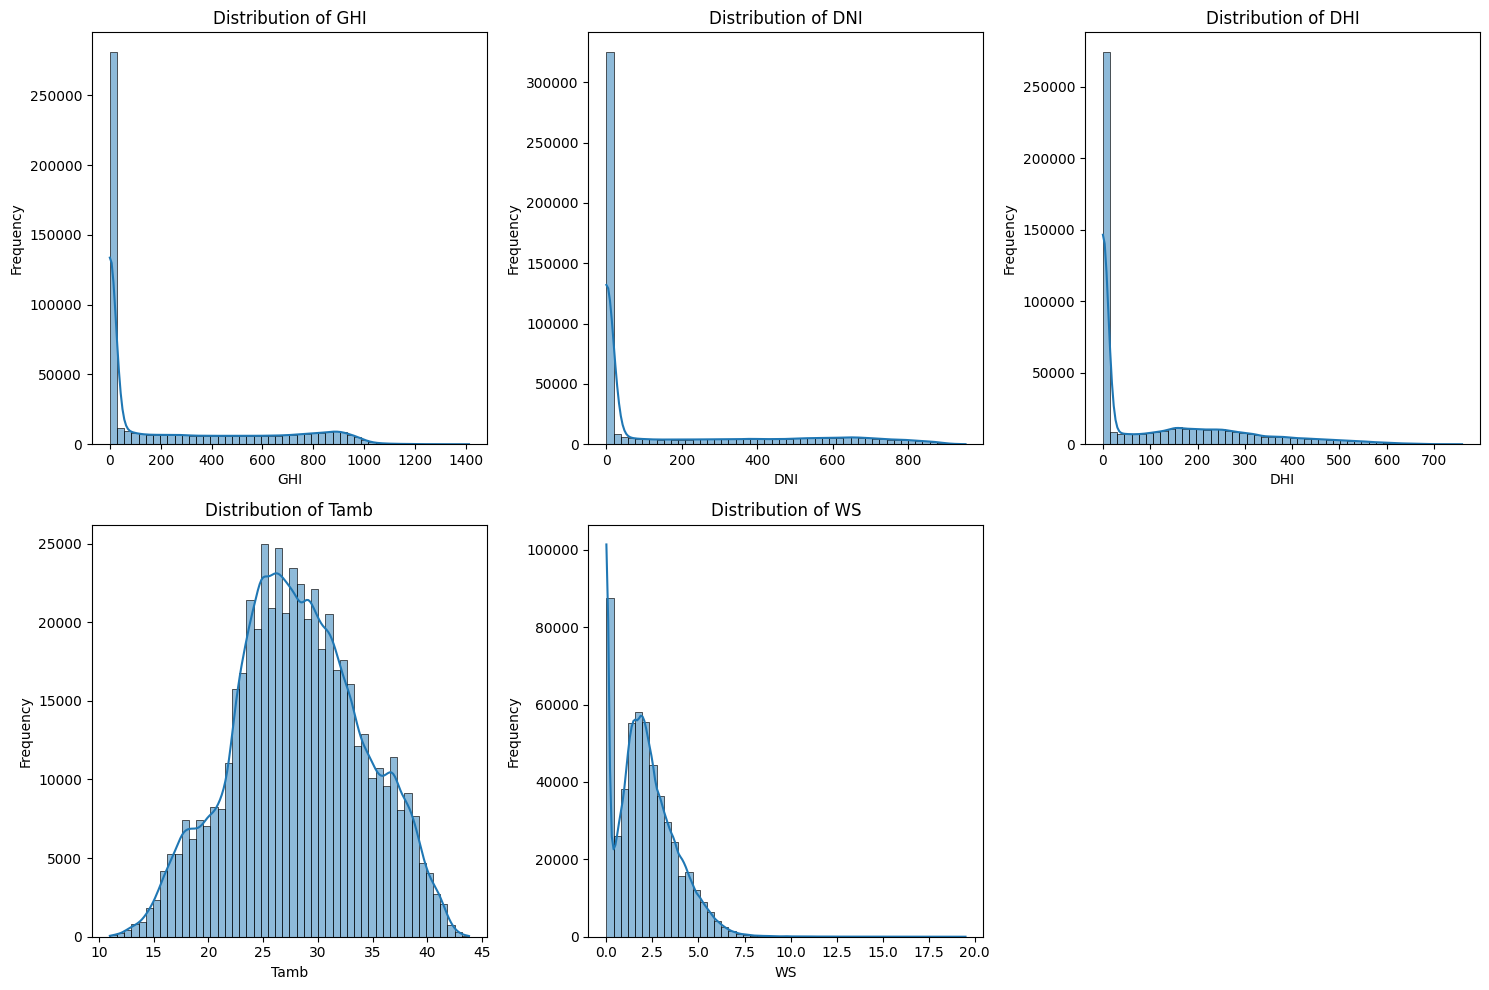

In [35]:
%pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a grid for plots
cols_to_check = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS']
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_check):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
%pip install scipy
from scipy import stats
# Define key columns for outlier detection
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Detect and handle outliers using Z-scores
for col in key_cols:
    if col in df.columns:
        # Calculate Z-scores, ignoring NaN
        z_scores = stats.zscore(df[col].dropna())
        # Create a mask for outliers (|Z| > 3)
        outlier_mask = abs(z_scores) > 3
        # Get the original indices of outliers
        outlier_indices = df.index[np.where(outlier_mask)[0]]
        print(f"Number of outliers for {col}: {len(outlier_indices)}")
        # Impute outliers with the median (only for non-NaN values)
        df.loc[outlier_indices, col] = df[col].median()

# Verify the shape and summary statistics after outlier handling
print("\nData shape after outlier handling:", df.shape)
print("\nSummary Statistics after outlier handling:")
print(df[['GHI', 'DNI', 'DHI', 'Tamb', 'WS']].describe())

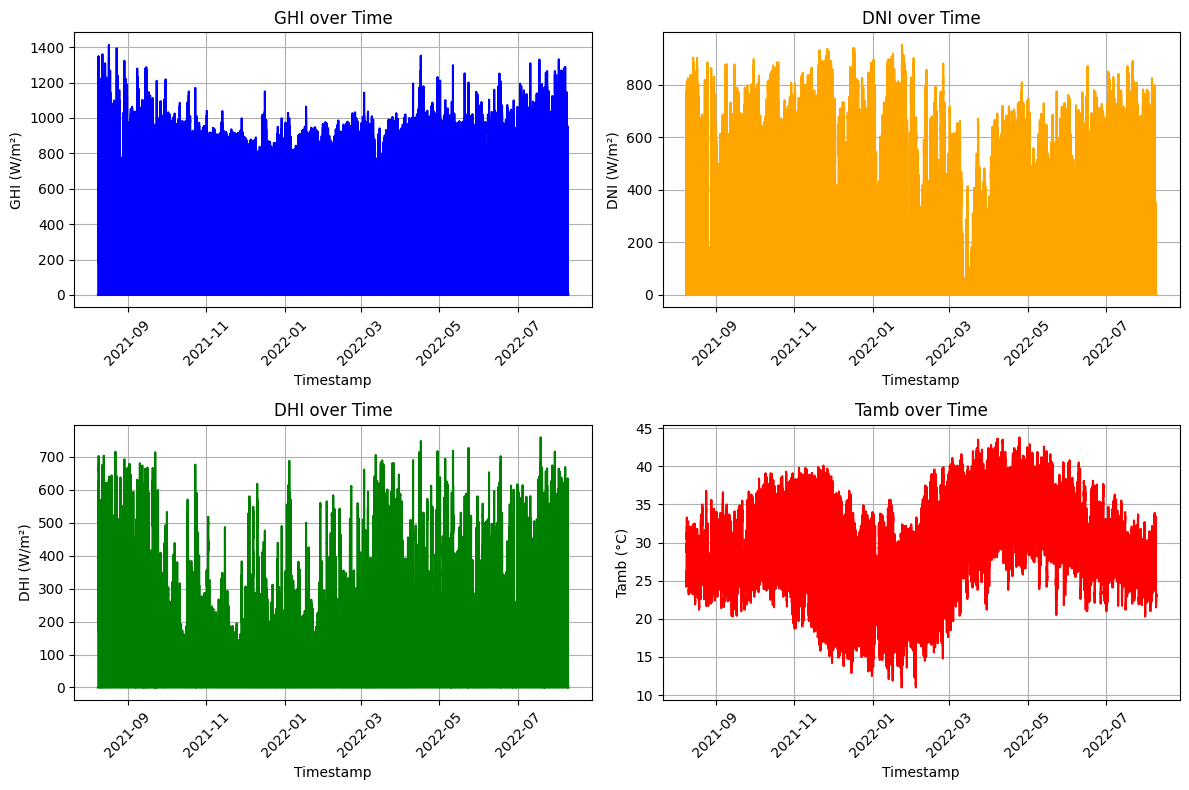

In [36]:

# Plot line charts for GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(12, 8))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='blue')
plt.title('GHI over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='orange')
plt.title('DNI over Time')
plt.xlabel('Timestamp')
plt.ylabel('DNI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)

# Plot DHI
plt.subplot(2, 2, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='green')
plt.title('DHI over Time')
plt.xlabel('Timestamp')
plt.ylabel('DHI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='red')
plt.title('Tamb over Time')
plt.xlabel('Timestamp')
plt.ylabel('Tamb (°C)')
plt.xticks(rotation=45)
plt.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig('timeseries_plots.png')
plt.show()

In [37]:
# Analyze patterns by month
monthly_avg = df.groupby(df.index.month)[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
print("Monthly Averages:\n", monthly_avg)

Monthly Averages:
                   GHI         DNI         DHI       Tamb
Timestamp                                               
1          238.208672  223.880405   87.524778  23.328141
2          264.001133  183.969382  126.635052  25.814008
3          249.390988  102.312684  163.437166  31.699034
4          270.166808  160.909766  136.354458  33.773639
5          257.649149  147.307014  137.040291  32.495177
6          233.598234  144.727801  119.423840  29.332551
7          223.498284  130.278300  121.930249  27.329886
8          200.777988   99.175948  122.958687  26.489048
9          223.573620  128.325472  122.793359  27.157532
10         262.199496  222.395853   96.663884  29.229462
11         250.570456  256.908984   76.731718  27.419646
12         232.329111  211.391015   92.947348  24.019283


In [38]:
# Analyze patterns by hour of the day
hourly_avg = df.groupby(df.index.hour)[['GHI', 'DNI', 'DHI']].mean()
print("\nHourly Averages:\n", hourly_avg)

# Look for anomalies (e.g., GHI spikes)
ghi_spikes = df[df['GHI'] > df['GHI'].quantile(0.99)]  # Top 1% of GHI values
print("\nPotential GHI Anomalies (Spikes):\n", ghi_spikes[['GHI']])


Hourly Averages:
                   GHI         DNI         DHI
Timestamp                                    
0            0.000297    0.001356    0.000123
1            0.000000    0.001169    0.000078
2            0.001306    0.001379    0.001845
3            0.001288    0.001096    0.001676
4            0.000146    0.001050    0.000315
5            0.000050    0.000881    0.000169
6            4.633046    1.267279    4.450799
7           82.797388   72.359817   64.844370
8          264.111726  237.557046  162.886703
9          462.279078  354.080233  242.170553
10         651.065927  436.337954  309.119589
11         776.070352  483.124388  343.839160
12         828.205489  500.168781  355.428027
13         811.553073  492.441749  353.377429
14         730.639954  470.921420  328.646402
15         581.463402  418.646580  280.811311
16         392.097502  335.606237  211.212584
17         186.990009  187.947324  121.799100
18          34.786854   28.135416   28.928671
19           0.

Average ModA and ModB by Cleaning Flag:
                 ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


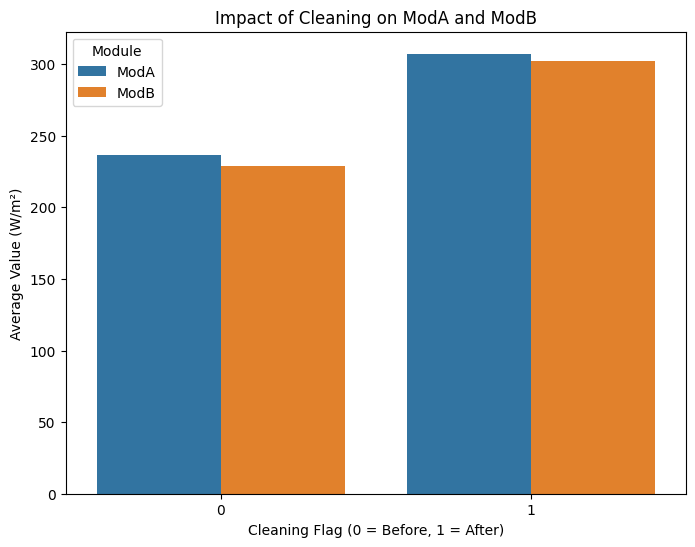

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Cleaning flag and calculate mean for ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("Average ModA and ModB by Cleaning Flag:\n", cleaning_impact)

# Plot the impact of cleaning on ModA and ModB
cleaning_impact_melted = cleaning_impact.reset_index().melt(id_vars='Cleaning', value_vars=['ModA', 'ModB'], var_name='Module', value_name='Value')
plt.figure(figsize=(8, 6))
sns.barplot(x='Cleaning', y='Value', hue='Module', data=cleaning_impact_melted)
plt.title('Impact of Cleaning on ModA and ModB')
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.ylabel('Average Value (W/m²)')
plt.savefig('cleaning_impact_plot.png')
plt.show()

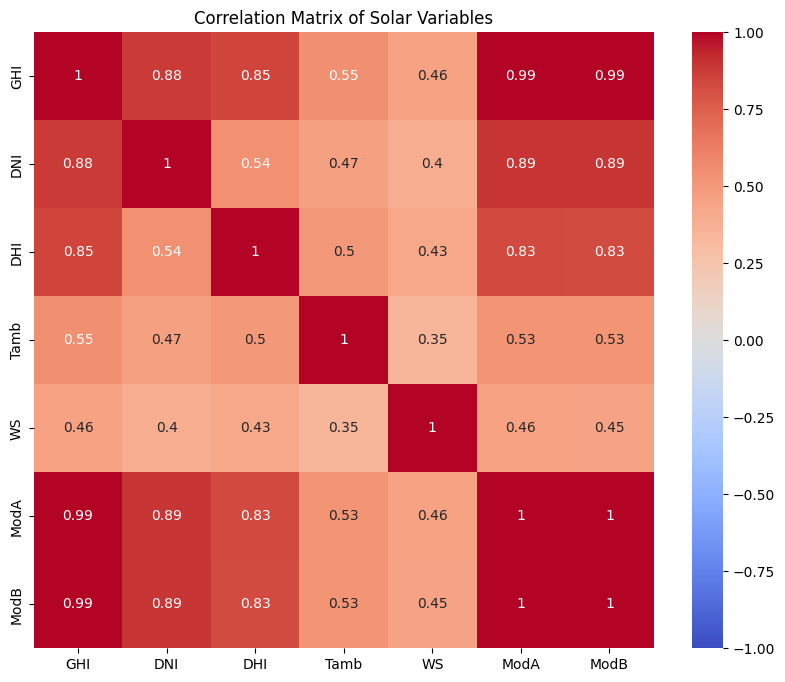

Correlation Matrix:
            GHI       DNI       DHI      Tamb        WS      ModA      ModB
GHI   1.000000  0.882251  0.848445  0.547113  0.456910  0.994477  0.994907
DNI   0.882251  1.000000  0.543834  0.467413  0.396881  0.891879  0.891868
DHI   0.848445  0.543834  1.000000  0.502429  0.425573  0.828884  0.826838
Tamb  0.547113  0.467413  0.502429  1.000000  0.347188  0.526868  0.525370
WS    0.456910  0.396881  0.425573  0.347188  1.000000  0.458483  0.450123
ModA  0.994477  0.891879  0.828884  0.526868  0.458483  1.000000  0.998745
ModB  0.994907  0.891868  0.826838  0.525370  0.450123  0.998745  1.000000


In [40]:
# Select columns for correlation analysis
correlation_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'ModA', 'ModB']

# Compute correlation matrix
correlation_matrix = df[correlation_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Solar Variables')
plt.savefig('correlation_heatmap.png')
plt.show()

print("Correlation Matrix:\n", correlation_matrix)


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


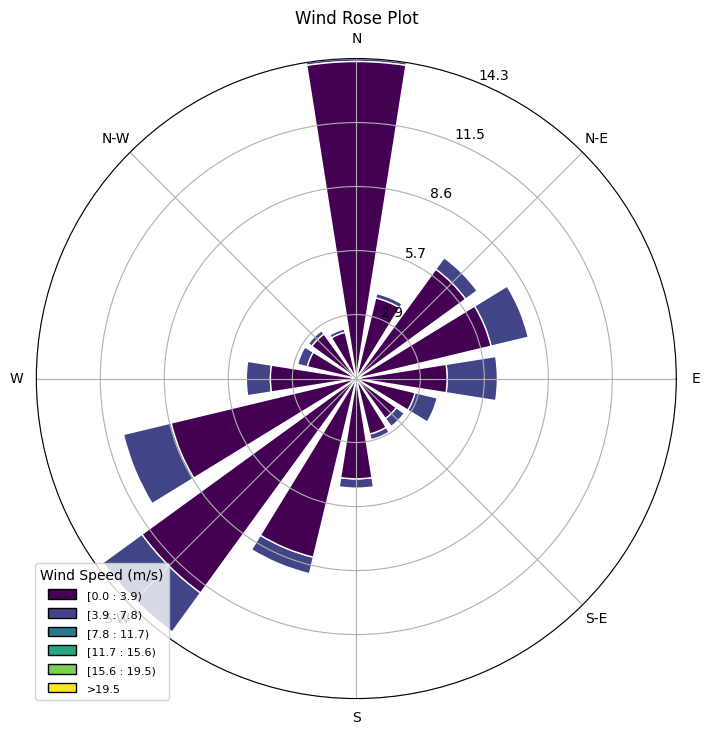

In [41]:
%pip install windrose
from windrose import WindroseAxes
import matplotlib.pyplot as plt
import os

# Create wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)")
plt.title('Wind Rose Plot')

# Create notebooks directory if it doesn't exist
os.makedirs('notebooks', exist_ok=True)
plt.savefig('wind_rose_plot.png')
plt.show()

In [43]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('../data/benin_cleaned.csv', index=True)
print("Cleaned dataset saved to 'data/benin_cleaned.csv'")

Cleaned dataset saved to 'data/benin_cleaned.csv'
